<a href="https://colab.research.google.com/github/TetianaMar-888/Python_for_ds_tasks/blob/main/Marinoshenko_Tetiana_HW_2_3_%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%B0_%D0%BF%D1%80%D0%B8%D0%B9%D0%BD%D1%8F%D1%82%D1%82%D1%8F_%D1%80%D1%96%D1%88%D0%B5%D0%BD%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [2]:
#!pip install --upgrade ipython

In [3]:
#link to my process_bank_churn.py file on GitHub:
#https://github.com/TetianaMar-888/Python_for_ds_tasks/commit/ac3af516a65c9efc42cdac7259ca6c7cc2a7aeae

In [4]:
!rm -rf process_bank_churn.py* __pycache__

In [5]:
!wget https://raw.githubusercontent.com/TetianaMar-888/Python_for_ds_tasks/refs/heads/main/process_bank_churn.py

--2025-11-04 19:40:11--  https://raw.githubusercontent.com/TetianaMar-888/Python_for_ds_tasks/refs/heads/main/process_bank_churn.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26271 (26K) [text/plain]
Saving to: ‘process_bank_churn.py’

process_bank_churn. 100%[===================>]  25.66K  --.-KB/s    in 0.002s  

2025-11-04 19:40:12 (10.9 MB/s) - ‘process_bank_churn.py’ saved [26271/26271]



In [6]:
!pip install matplotlib-venn

In [7]:
!ls

process_bank_churn.py  sample_data


In [8]:
import importlib
import process_bank_churn
print(process_bank_churn.__file__)

/content/process_bank_churn.py


In [9]:
importlib.reload(process_bank_churn)

<module 'process_bank_churn' from '/content/process_bank_churn.py'>

In [10]:
from process_bank_churn import *

In [11]:
from process_bank_churn import prepare_datasets, prepare_datasets_from_df, prepare_submission_test

In [12]:
?prepare_submission_test

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import zipfile as zf
import seaborn as sns
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
raw_df = pd.read_csv("/content/drive/MyDrive/Machine_Learning/bank-customer-churn-prediction-dlu-course-c/train.csv")

In [16]:
print(type(raw_df))

<class 'pandas.core.frame.DataFrame'>


In [17]:
print(raw_df.columns)

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [18]:
print(raw_df.dtypes)
print("\n" + "="*50 + "\n")

id                   int64
CustomerId         float64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited             float64
dtype: object




In [19]:
import process_bank_churn
print(dir(process_bank_churn))

['DatasetBundle', 'Dict', 'List', 'MinMaxScaler', 'OneHotEncoder', 'Path', 'SimpleImputer', 'Tuple', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'annotations', 'dataclass', 'detect_column_types', 'drop_required_na', 'fit_numeric_imputer', 'fit_onehot_encoder', 'fit_scaler', 'np', 'pd', 'prepare_datasets', 'prepare_datasets_from_df', 'prepare_submission_test', 'process_data', 'read_csv_at', 'resolve_data_path', 'split_60_20_20', 'split_features_target', 'train_test_split', 'transform_numeric_imputer', 'transform_onehot_concat', 'transform_scaler', 'warnings']


In [20]:
# Використовуйте нову функцію
data = prepare_datasets_from_df(raw_df)

In [21]:
# Доступ до даних
print(data.train_X.shape)
print(data.train_y.shape)

(9000, 700)
(9000,)


In [22]:
data = prepare_datasets("/content/drive/MyDrive/Machine_Learning/bank-customer-churn-prediction-dlu-course-c/train.csv")

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [24]:
X_train = data.train_X
train_targets = data.train_y
X_val = data.val_X
val_targets = data.val_y
X_test = data.test_X
test_targets = data.test_y

In [25]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Surname_Achebe,Surname_Ahern,Surname_Aikenhead,Surname_Aitken,Surname_Akabueze,Surname_Akhtar,Surname_Akobundu,Surname_Aksakova,Surname_Aksenov,Surname_Aksenova,Surname_Aksyonov,Surname_Aksyonova,Surname_Atherton,Surname_Avent,Surname_Azikiwe,Surname_Azubuike,Surname_Babbage,Surname_Bage,Surname_Bair,Surname_Bales,Surname_Balsillie,Surname_Bancks,Surname_Baresi,Surname_Baryshnikov,Surname_Bazarova,Surname_Bell,Surname_Bellucci,Surname_Bergamaschi,Surname_Bess,Surname_Bevan,Surname_Bibi,Surname_Binder,Surname_Biryukov,Surname_Biryukova,Surname_Bischof,Surname_Bitter,Surname_Black,Surname_Blesing,Surname_Bock,Surname_Bogle,Surname_Boulger,Surname_Bovee,Surname_Brazenor,Surname_Brient,Surname_Brown,Surname_Brownless,Surname_Buchi,Surname_Burns,Surname_Burt,Surname_Burtch,Surname_Cairns,Surname_Calabrese,Surname_Calabresi,Surname_Cameron,Surname_Cattaneo,Surname_Cavenagh,Surname_Cawker,Surname_Cawood,Surname_Cawthorne,Surname_Ch'ang,Surname_Ch'en,Surname_Ch'eng,Surname_Ch'ien,Surname_Ch'in,Surname_Ch'iu,Surname_Chia,Surname_Chiabuotu,Surname_Chiagoziem,Surname_Chialuka,Surname_Chiang,Surname_Chiawuotu,Surname_Chiazagomekpele,Surname_Chiazagomekpere,Surname_Chibueze,Surname_Chibugo,Surname_Chibuzo,Surname_Chidalu,Surname_Chidi,Surname_Chidiebele,Surname_Chidiebere,Surname_Chidiegwu,Surname_Chidimma,Surname_Chidozie,Surname_Chidubem,Surname_Chidumaga,Surname_Chiebuka,Surname_Chiedozie,Surname_Chiekwugo,Surname_Chieloka,Surname_Chiemeka,Surname_Chiemela,Surname_Chiemenam,Surname_Chiemezie,Surname_Chien,Surname_Chienezie,Surname_Chifley,Surname_Chiganu,Surname_Chigbogu,Surname_Chigolum,Surname_Chigozie,Surname_Chijindum,Surname_Chijioke,Surname_Chikelu,Surname_Chikere,Surname_Chikezie,Surname_Chikwado,Surname_Chikwendu,Surname_Chimaobim,Surname_Chimaoke,Surname_Chimezie,Surname_Chin,Surname_Chinagorom,Surname_Chinedum,Surname_Chineze,Surname_Chinomso,Surname_Chinonwu,Surname_Chinonyelum,Surname_Chinweike,Surname_Chinwemma,Surname_Chinwendu,Surname_Chinwenma,Surname_Chinweuba,Surname_Chioke,Surname_Chiu,Surname_Chiwetelu,Surname_Chizoba,Surname_Chizuoke,Surname_Chu,Surname_Chuang,Surname_Chukwualuka,Surname_Chukwubuikem,Surname_Chukwudi,Surname_Chukwuebuka,Surname_Chukwueloka,Surname_Chukwuemeka,Surname_Chukwufumnanya,Surname_Chukwuhaenye,Surname_Chukwujamuike,Surname_Chukwujekwu,Surname_Chukwukadibia,Surname_Chukwukere,Surname_Chukwuma,Surname_Chukwumaobim,Surname_Chukwunonso,Surname_Chukwuraenye,Surname_Chung,Surname_Cisneros,Surname_Clements,Surname_Cone,Surname_Crawford,Surname_Cremonesi,Surname_Creswell,Surname_Cribb,Surname_Curnow,Surname_Czajkowski,Surname_D'Albertis,Surname_Dancy,Surname_Davide,Surname_Davidson,Surname_Davison,Surname_De Bernales,Surname_De Garis,Surname_De Luca,Surname_De Mestre,Surname_De Neeve,Surname_De Salis,Surname_DeRose,Surname_Deleon,Surname_Dennys,Surname_Dettmann,Surname_Dickson,Surname_Dike,Surname_Dilibe,Surname_Dore,Surname_Doyne,Surname_Dreyer,Surname_Dufresne,Surname_Dyer,Surname_Eames,Surname_Ebelechukwu,Surname_Ebelegbulam,Surname_Echezonachukwu,Surname_Efimov,Surname_Efremov,Surname_Eiland,Surname_Eipper,Surname_Ejimofor,Surname_Ekechukwu,Surname_Eluemuno,Surname_Erskine,Surname_Estep,Surname_Estrada,Surname_Ewen,Surname_Ewing,Surname_Fadden,Surname_Fan,Surname_Fang,Surname_Fanucci,Surname_Farrar,Surname_Fennell,Surname_Fennescey,Surname_Fenton,Surname_Fetherstonhaugh,Surname_Fink,Surname_Fiorentini,Surname_Fiorentino,Surname_Fisk,Surname_Fitts,Surname_Fokine,Surname_Folliero,Surname_Fomin,Surname_Fomina,Surname_Foveaux,Surname_Fries,Surname_Frolov,Surname_Frolova,Surname_Fyans,Surname_Fyodorov,Surname_Fyodorova,Surname_Gadsden,Surname_Galkin,Surname_Gannon,Surname_Gant,Surname_Garmon,Surname_Gartrell,Surname_Gboliwe,Surname_Gell,Surname_Genovese,Surname_Genovesi,Surname_Gentry,Surname_Gidney,Surname_Gilleland,Surname_Golibe,Surname_Goliwe,Surname_Gomes,Surname_Gorman,Surname_Greco,Surname_Gresswell,Surname

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
model = DecisionTreeClassifier(random_state=42)

In [28]:
%%time
model.fit(X_train, train_targets)

CPU times: user 631 ms, sys: 9.54 ms, total: 640 ms
Wall time: 643 ms


DecisionTreeClassifier(random_state=42)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [30]:
train_preds = model.predict(X_train)

In [31]:
train_preds

array([0, 0, 1, ..., 1, 1, 0])

In [32]:
pd.value_counts(train_preds)

/tmp/ipython-input-1258350197.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_preds)


,count
0,7169
1,1831


In [33]:
train_probs = model.predict_proba(X_train)

In [34]:
train_probs[:10]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [35]:
accuracy_score(train_targets, train_preds)

1.0

In [36]:
model.score(X_val, val_targets)

0.869

In [37]:
val_targets.value_counts() / len(val_targets)

,count
Exited,
0,0.796333
1,0.203667


In [38]:
from sklearn.tree import plot_tree, export_text

In [39]:
model.tree_.max_depth

43

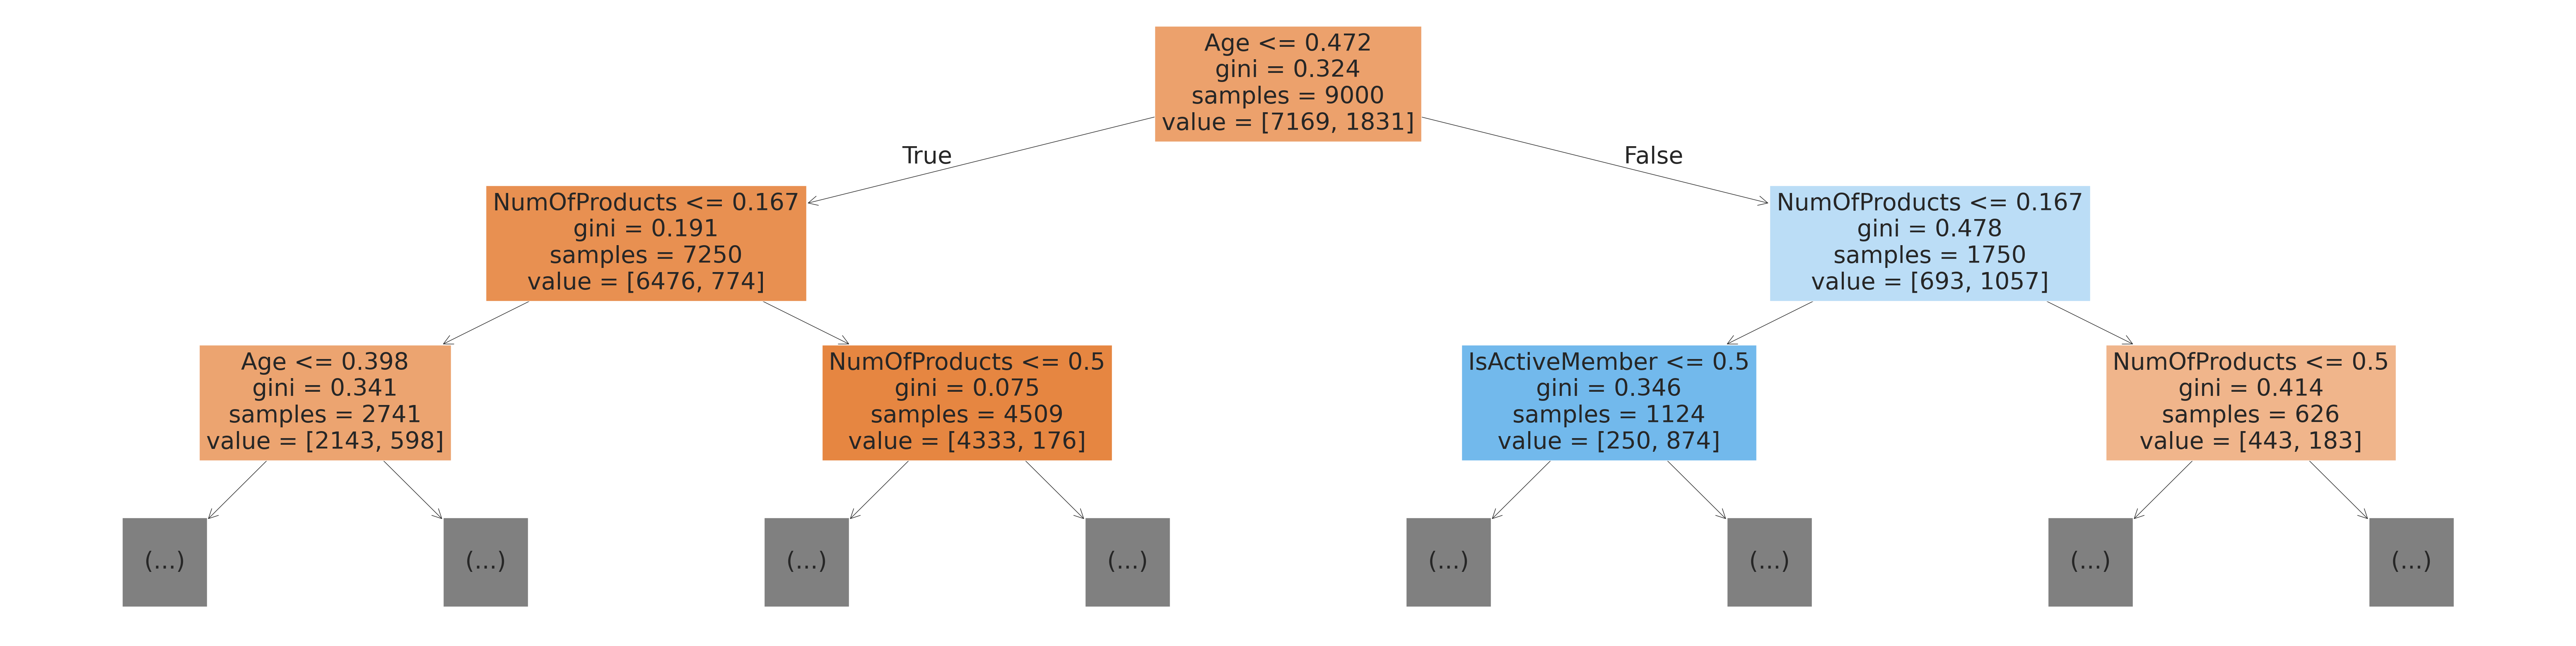

In [40]:
plt.figure(figsize=(80, 20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [41]:
tree_text = export_text(model, max_depth=2, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Age <= 0.47
|   |--- NumOfProducts <= 0.17
|   |   |--- Age <= 0.40
|   |   |   |--- truncated branch of depth 34
|   |   |--- Age >  0.40
|   |   |   |--- truncated branch of depth 27
|   |--- NumOfProducts >  0.17
|   |   |--- NumOfProducts <= 0.50
|   |   |   |--- truncated branch of depth 41
|   |   |--- NumOfProducts >  0.50
|   |   |   |--- truncated branch of depth 7
|--- Age >  0.47
|   |--- NumOfProducts <= 0.17
|   |   |--- IsActiveMember <= 0.50
|   |   |   |--- truncated branch of depth 18
|   |   |--- IsActiveMember >  0.50
|   |   |   |--- truncated branch of depth 18
|   |--- NumOfProducts >  0.17
|   |   |--- NumOfProducts <= 0.50
|   |   |   |--- truncated branch of depth 29
|   |   |--- NumOfProducts >  0.50
|   |   |   |--- class: 1



# Найвпливовішими ознаками є Age, NumOfProducts, IsActiveMember

In [42]:
model.feature_importances_.round(2)

array([0.07, 0.32, 0.03, 0.06, 0.17, 0.01, 0.03, 0.06, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.

In [43]:
importance_df = pd.DataFrame({
    "feature": X_train.columns,
    "importance": model.feature_importances_
}).sort_values('importance', ascending=False)

In [44]:
importance_df.head(10)

,feature,importance
1,Age,0.323498
4,NumOfProducts,0.172299
0,CreditScore,0.065033
7,EstimatedSalary,0.062529
3,Balance,0.061173
6,IsActiveMember,0.033405
2,Tenure,0.029420
695,Geography_Germany,0.017545
697,Gender_Female,0.009602
698,Gender_Male,0.008231


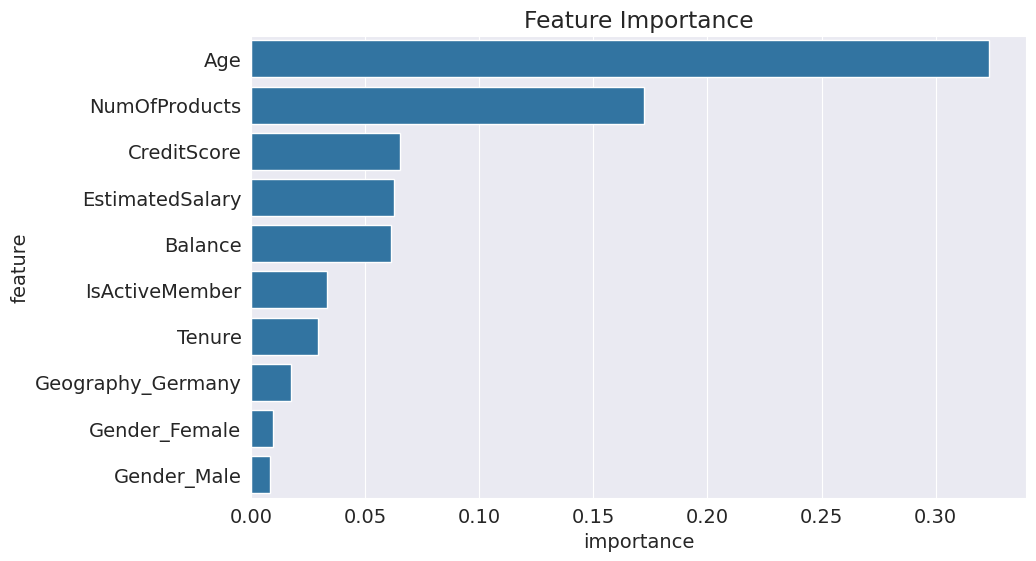

In [45]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [46]:
?DecisionTreeClassifier

In [47]:
model = DecisionTreeClassifier(max_depth=11, random_state=42)

In [48]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=11, random_state=42)

In [49]:
model.score(X_train, train_targets)

0.9477777777777778

In [50]:
model.score(X_val, val_targets)

0.8833333333333333

точність на валідаційних даних трішки збільшилась

In [51]:
model.classes_

array([0, 1])

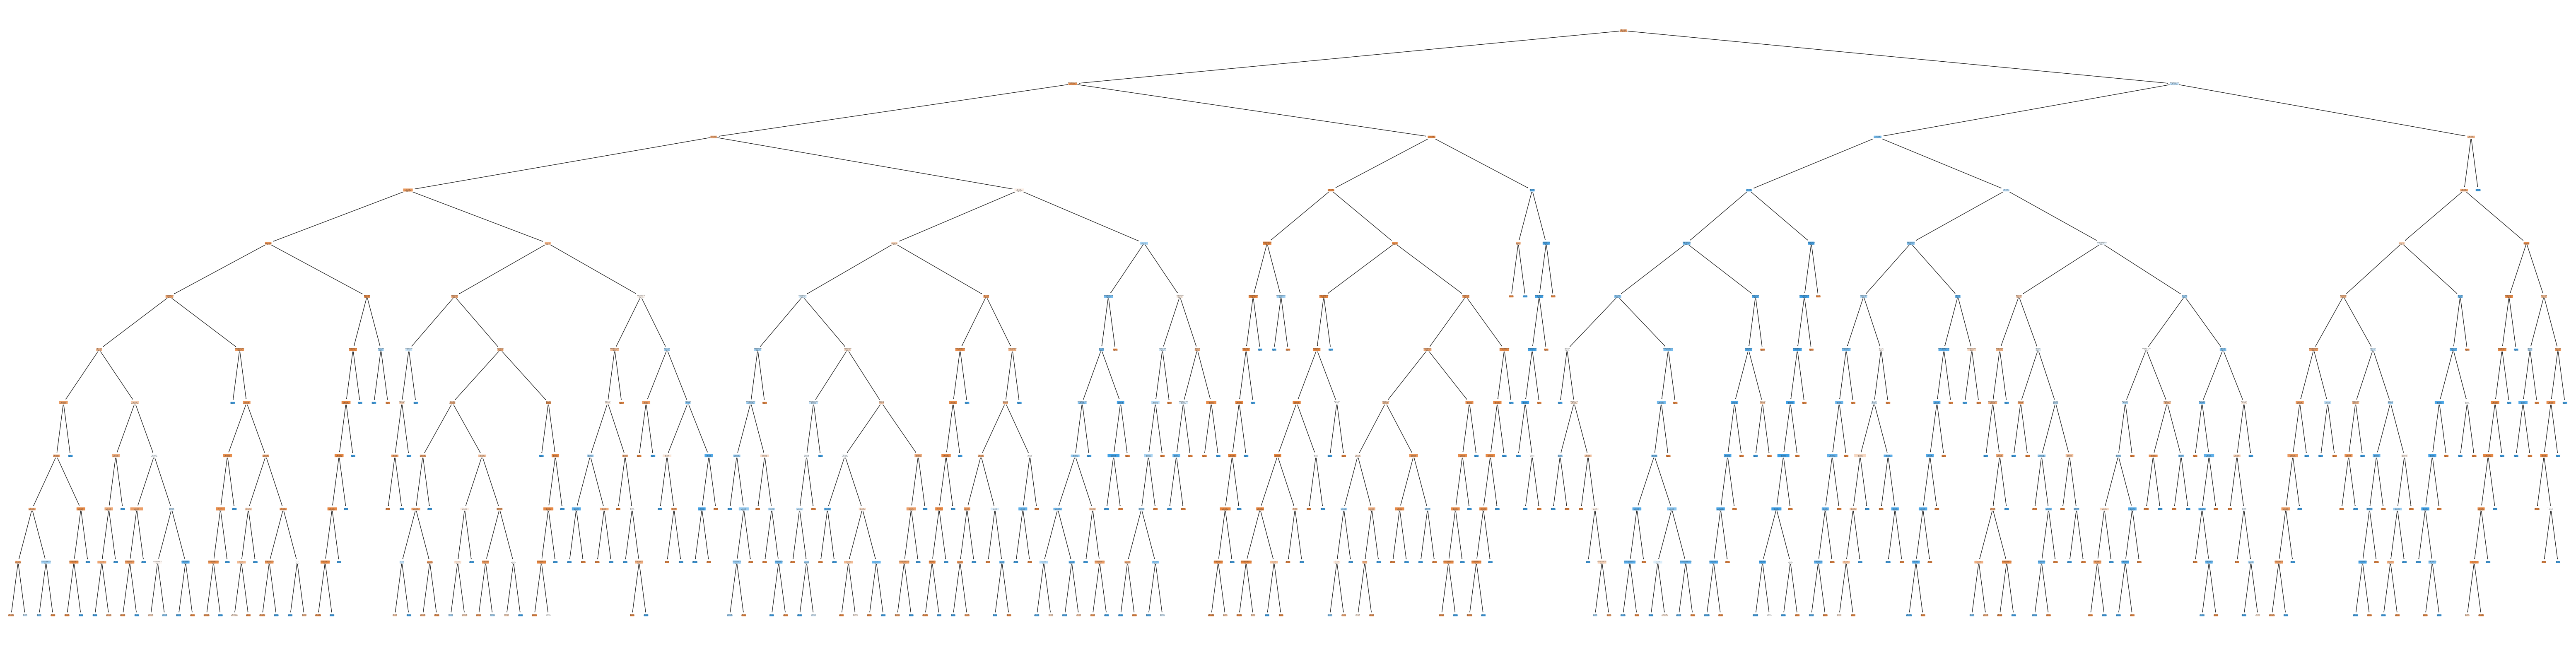

In [52]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=[str(c) for c in model.classes_]);

In [53]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- Age <= 0.47
|   |--- NumOfProducts <= 0.17
|   |   |--- Age <= 0.40
|   |   |   |--- Geography_Germany <= 0.50
|   |   |   |   |--- Balance <= 0.32
|   |   |   |   |   |--- IsActiveMember <= 0.50
|   |   |   |   |   |   |--- Age <= 0.31
|   |   |   |   |   |   |   |--- Surname_Palerma <= 0.50
|   |   |   |   |   |   |   |   |--- CreditScore <= 0.68
|   |   |   |   |   |   |   |   |   |--- CreditScore <= 0.67
|   |   |   |   |   |   |   |   |   |   |--- Tenure <= 0.95
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- Tenure >  0.95
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- CreditScore >  0.67
|   |   |   |   |   |   |   |   |   |   |--- Surname_Macdonald <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- Surname_Macdonald >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [54]:
def max_depth_error(md):
  model = DecisionTreeClassifier(max_depth=md, random_state=42)
  model.fit(X_train, train_targets)
  train_error = 1 - model.score(X_train, train_targets)
  val_error = 1 - model.score(X_val, val_targets)
  return{'Max Depth': md, 'Training Error': train_error, 'Validation Error': val_error}

In [55]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: user 6.83 s, sys: 425 ms, total: 7.25 s
Wall time: 7.42 s


In [56]:
errors_df.style.background_gradient(subset='Validation Error', cmap='Blues_r')

,Max Depth,Training Error,Validation Error
0,1,0.163000,0.168333
1,2,0.134111,0.140667
2,3,0.119000,0.124667
3,4,0.112778,0.119667
4,5,0.101444,0.103000
5,6,0.094556,0.106667
6,7,0.086444,0.107667
7,8,0.078444,0.114667
8,9,0.068556,0.115000
9,10,0.060000,0.114333


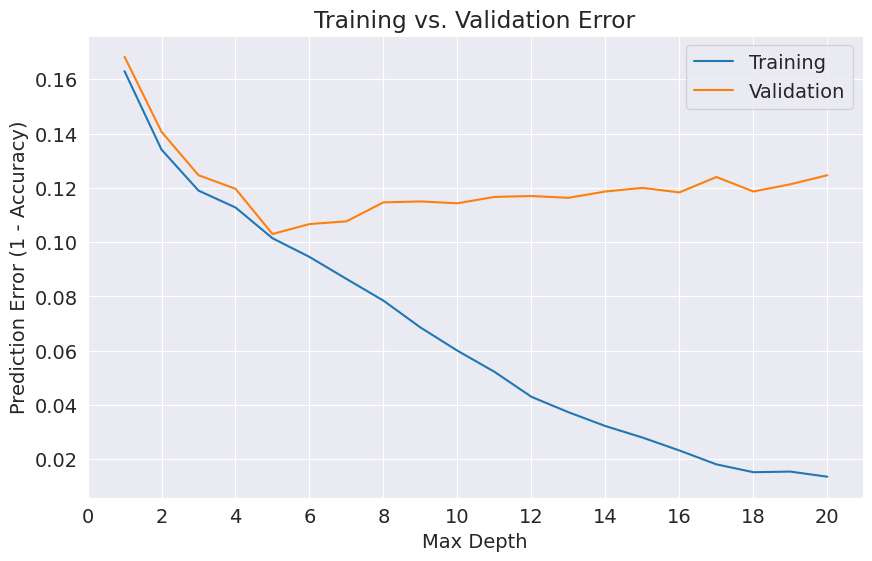

In [57]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation']);

In [58]:
model = DecisionTreeClassifier(max_depth=5, random_state=42).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.897

In [59]:
#max_leaf_nodes
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [60]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [61]:
model.score(X_train, train_targets)

0.9247777777777778

In [62]:
model.score(X_val, val_targets)

0.8893333333333333

In [63]:
model.tree_.max_depth

12

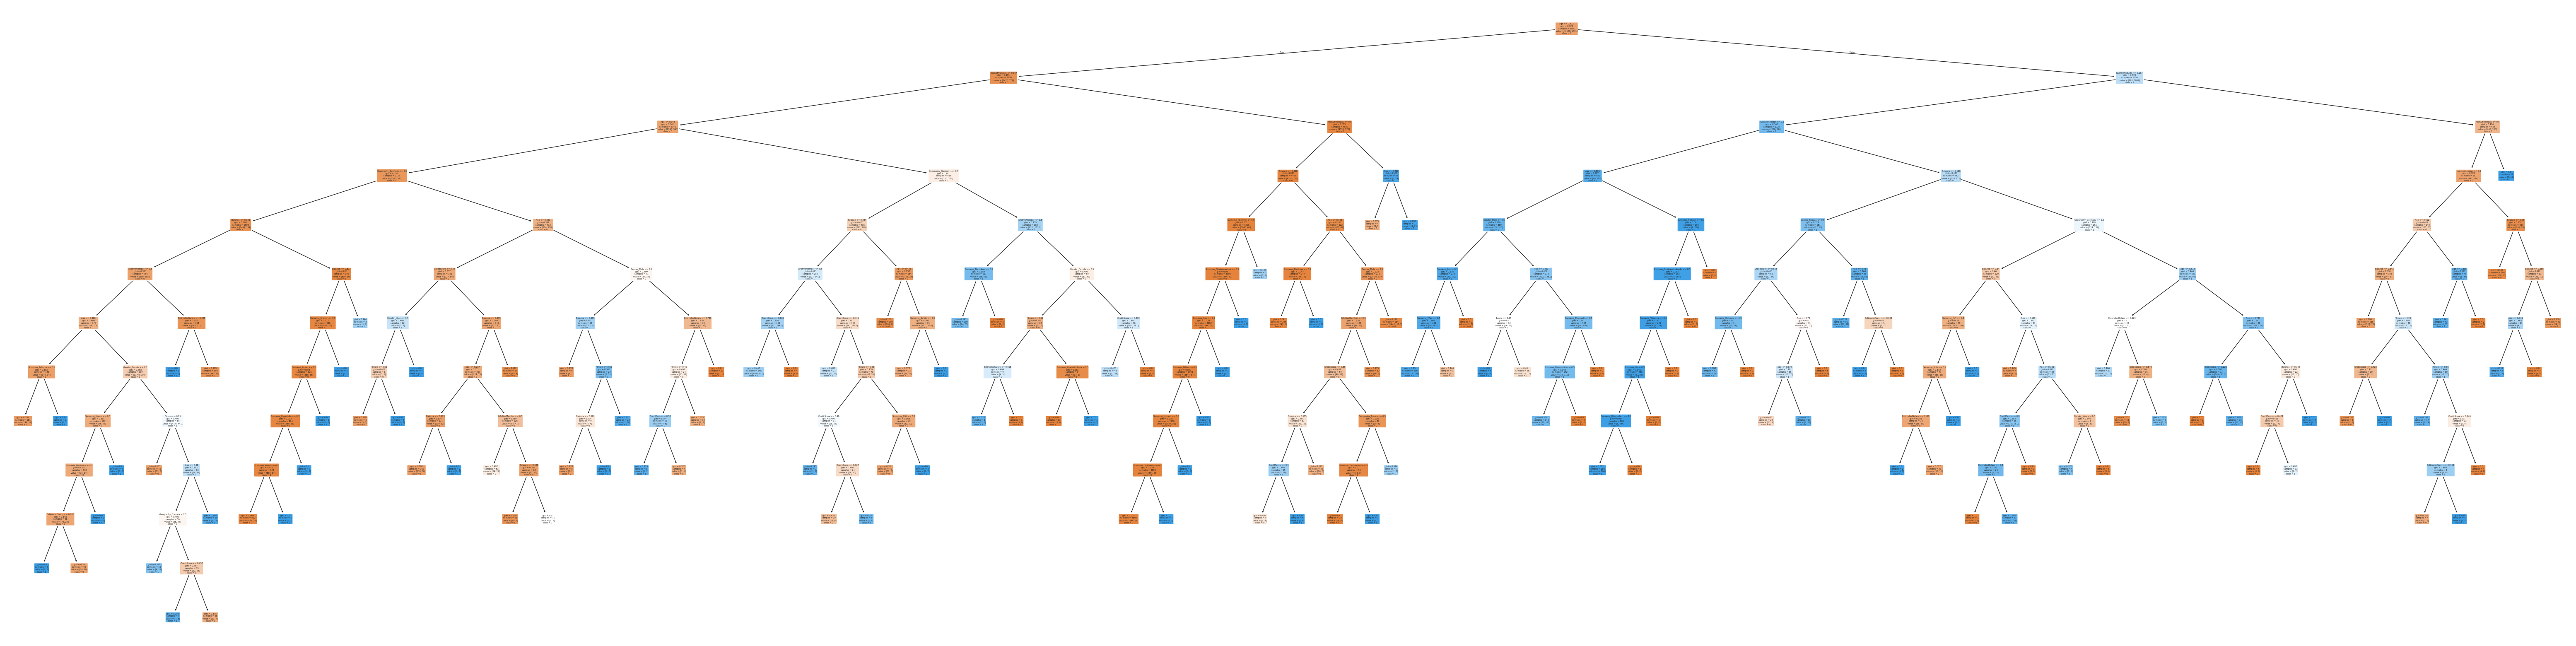

In [64]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=[str(c) for c in model.classes_]);

In [65]:
model_text = export_text(model, feature_names=list(X_train.columns))
print(model_text[:3000])

|--- Age <= 0.47
|   |--- NumOfProducts <= 0.17
|   |   |--- Age <= 0.40
|   |   |   |--- Geography_Germany <= 0.50
|   |   |   |   |--- Balance <= 0.32
|   |   |   |   |   |--- IsActiveMember <= 0.50
|   |   |   |   |   |   |--- Age <= 0.31
|   |   |   |   |   |   |   |--- Surname_Palerma <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Surname_Palerma >  0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Age >  0.31
|   |   |   |   |   |   |   |--- Gender_Female <= 0.50
|   |   |   |   |   |   |   |   |--- Surname_Manna <= 0.50
|   |   |   |   |   |   |   |   |   |--- Surname_Maclean <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- EstimatedSalary <= 0.05
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- EstimatedSalary >  0.05
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Surname_Maclean >  0.50
|   |   |   |

Найкращий номер ітерації 5. Хоча до 12 ітерації спостерігаються гарні показники.

In [66]:
model = DecisionTreeClassifier(random_state=42)
path = model.cost_complexity_pruning_path(X_train, train_targets)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

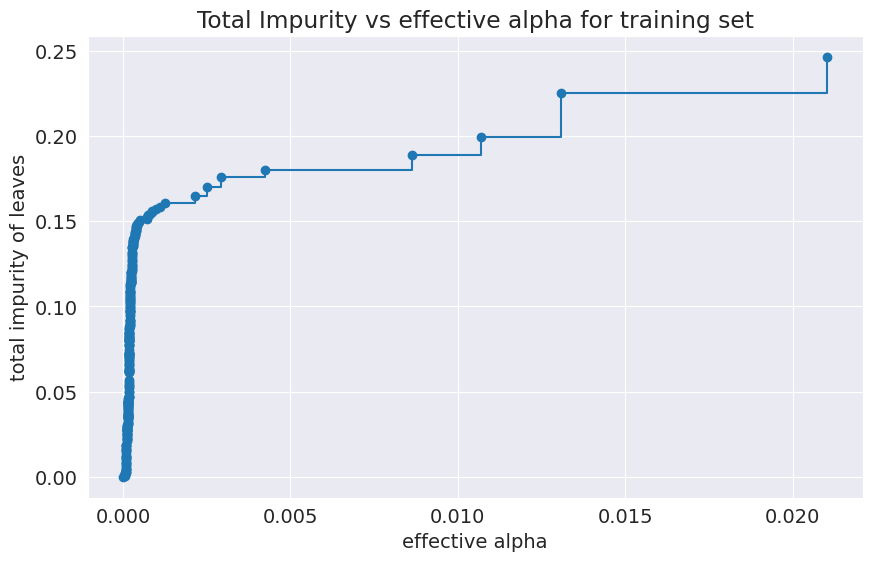

In [67]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [68]:
len(ccp_alphas)

290

In [69]:
models = []
for ccp_alpha in ccp_alphas[-10:]:
  model = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
  model.fit(X_train, train_targets)
  models.append(model)
  print(
      "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
          models[-1].tree_.node_count, ccp_alphas[-1]
      )
  )

Number of nodes in the last tree is: 27 with ccp_alpha: 0.07745608769689216
Number of nodes in the last tree is: 23 with ccp_alpha: 0.07745608769689216
Number of nodes in the last tree is: 19 with ccp_alpha: 0.07745608769689216
Number of nodes in the last tree is: 15 with ccp_alpha: 0.07745608769689216
Number of nodes in the last tree is: 13 with ccp_alpha: 0.07745608769689216
Number of nodes in the last tree is: 11 with ccp_alpha: 0.07745608769689216
Number of nodes in the last tree is: 9 with ccp_alpha: 0.07745608769689216
Number of nodes in the last tree is: 5 with ccp_alpha: 0.07745608769689216
Number of nodes in the last tree is: 3 with ccp_alpha: 0.07745608769689216
Number of nodes in the last tree is: 1 with ccp_alpha: 0.07745608769689216


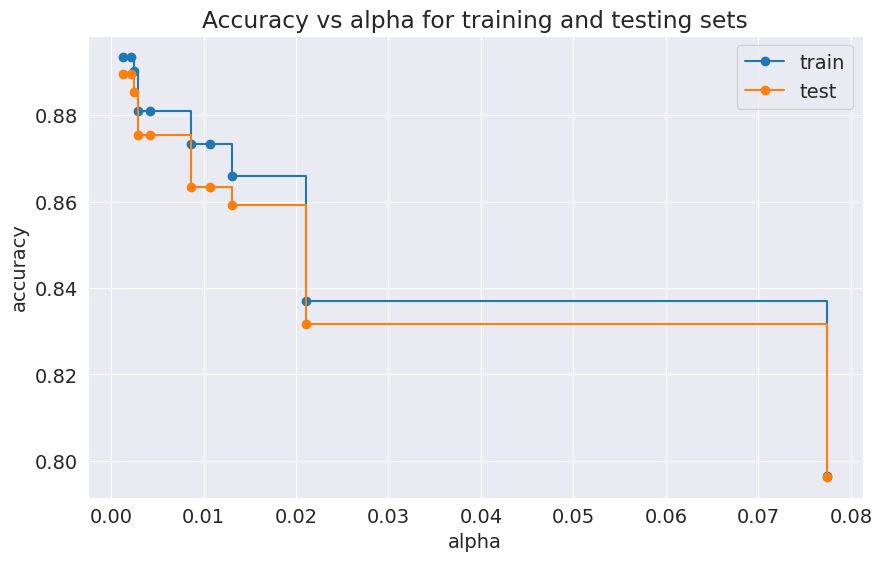

In [70]:
train_scores = [model.score(X_train, train_targets) for model in models]
val_scores = [model.score(X_val, val_targets) for model in models]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[-10:], train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas[-10:], val_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [71]:
model = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alphas[-20])
model.fit(X_train, train_targets)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0005018395252837978),
                       random_state=42)

In [72]:
model.tree_.max_depth

8

In [73]:
model.score(X_train, train_targets)

0.9006666666666666

In [74]:
model.score(X_val, val_targets)

0.898

Підхід з альфою дав трішки кращий результат

In [75]:
model.predict_proba(X_train)

array([[0.97696477, 0.02303523],
       [0.81420765, 0.18579235],
       [0.34868421, 0.65131579],
       ...,
       [0.03071672, 0.96928328],
       [0.09859155, 0.90140845],
       [0.97696477, 0.02303523]])

і модель вже не така впевнена

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [76]:
model = DecisionTreeClassifier(max_depth=5, random_state=42).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.897

In [77]:
raw_df_test = pd.read_csv("/content/drive/MyDrive/Machine_Learning/bank-customer-churn-prediction-dlu-course-c/test.csv")

In [78]:
raw_df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97


In [79]:
print(raw_df.columns)

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [80]:
print(raw_df_test.columns)

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [81]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [82]:
train_data = prepare_datasets_from_df(raw_df)

In [83]:
X_test, ids = prepare_submission_test(raw_df_test, train_data)

In [84]:
model.fit(train_data.train_X, train_data.train_y)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [85]:
y_pred = model.predict(X_test)

In [86]:
print(len(raw_df_test))  # очікуємо 10000
print(len(ids))          # має бути 10000
print(len(X_test))       # теж має бути 10000

10000
10000
10000


In [96]:
submission = pd.DataFrame({
    "CustomerId": ids,
    "Exited": y_pred
})

In [97]:
submission["CustomerId"] = submission["CustomerId"].astype(int)

In [98]:
print(submission.head())
print(submission.columns)
print(submission.dtypes)

   CustomerId  Exited
0    15594796       0
1    15642821       0
2    15716284       0
3    15785078       1
4    15662955       0
Index(['CustomerId', 'Exited'], dtype='object')
CustomerId    int64
Exited        int64
dtype: object


In [99]:
submission.to_csv("submission.csv", index=False, encoding="utf-8", sep=",", float_format="%.0f")

In [100]:
!head submission.csv

CustomerId,Exited
15594796,0
15642821,0
15716284,0
15785078,1
15662955,0
15759066,0
15754926,0
15664802,0
15757537,0


In [101]:
import pandas as pd
check = pd.read_csv("submission.csv")
print(check.head())
print(check.shape)

   CustomerId  Exited
0    15594796       0
1    15642821       0
2    15716284       0
3    15785078       1
4    15662955       0
(10000, 2)
